# Regressão

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import metrics
from utils import carrega_dataset_boston_housing
import seaborn.apionly as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import graphviz

data = carrega_dataset_boston_housing()
data.drop(['Unnamed: 0'], axis=1, inplace=True)

data


c:\DEV\Guilherme\Seminario_Nao_Parametrica\venv\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
corr = data.corr()

corr


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


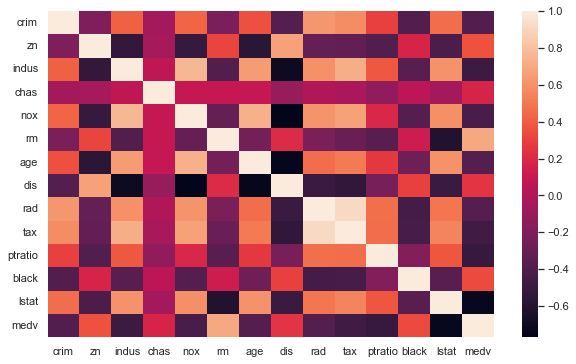

In [3]:
sns.set_theme()
sns.set_theme("notebook")
sns.set(rc={"figure.figsize": [10, 6]})

sns.heatmap(corr);

## Separação de dados em treino e teste, e seleção de variáveis

In [4]:
y = data[["medv"]]
X = data.loc[:,['indus','tax','ptratio', 'lstat', 'rm']]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=999)

# Algoritmo de árvores de decisão

In [5]:
treereg = DecisionTreeRegressor(random_state=999, max_depth = 3, criterion = "squared_error")

In [6]:
treereg.fit(X_train, y_train)

dot_data = export_graphviz(treereg, feature_names=list(X.columns),  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data)
graph.render("tree")
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
y_pred_tree = treereg.predict(X_test)

df=pd.DataFrame({'Actual':y_test.iloc[:,0], 'Predicted':y_pred_tree})

treemse = metrics.mean_squared_error(y_test, y_pred_tree)
treemae = metrics.mean_absolute_error(y_test, y_pred_tree)

print('Mean Squared Error:', treemse)
print('Mean Absolute Error:', treemae)



Mean Squared Error: 24.669935378079575
Mean Absolute Error: 3.738466370052424


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 999, max_depth = 3)

# Train the model on training data
rf.fit(X_train, y_train.iloc[:,0])

predictions = rf.predict(X_test)

rfmse =  metrics.mean_squared_error(y_test, predictions)
rfmae = metrics.mean_absolute_error(y_test, predictions)

print('Mean Squared Error:', rfmse)
print('Mean Absolute Error:', rfmae, "\n")
print('Mean Squared Error Reduction ratio:', 1 - (rfmse/treemse))
print('Mean Absolute Error Reduction ratio:', 1 - (rfmae/treemae))


Mean Squared Error: 14.33927430037819
Mean Absolute Error: 2.77559623000172 

Mean Squared Error Reduction ratio: 0.4187550927628564
Mean Absolute Error Reduction ratio: 0.25755752352460026
